In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score

In [2]:
poly_non_test_5_df = pd.read_pickle("./poly_non_test_5_df.pkl")
y_non_test = pd.read_pickle("./y_non_test.pkl")
poly_non_test_6_df = pd.read_pickle("./poly_non_test_6_df.pkl")

In [3]:
poly_non_test_5_df.head()

,1,power,manual,years_old,mileage per year,power^2,power manual,power years_old,power mileage per year,manual^2,manual years_old,manual mileage per year,years_old^2,years_old mileage per year,mileage per year^2
202106224112829,1.0,325.0,1.0,15.0,4921.375000,105625.0,325.0,4875.0,1.599447e+06,1.0,15.0,4921.375000,225.0,73820.625000,2.421993e+07
202110148485474,1.0,350.0,1.0,15.0,1860.312500,122500.0,350.0,5250.0,6.511094e+05,1.0,15.0,1860.312500,225.0,27904.687500,3.460763e+06
202108246593754,1.0,250.0,1.0,31.0,2545.093750,62500.0,250.0,7750.0,6.362734e+05,1.0,31.0,2545.093750,961.0,78897.906250,6.477502e+06
202108236550132,1.0,365.0,1.0,3.0,4750.000000,133225.0,365.0,1095.0,1.733750e+06,1.0,3.0,4750.000000,9.0,14250.000000,2.256250e+07
202110268901845,1.0,365.0,1.0,5.0,3666.666667,133225.0,365.0,1825.0,1.338333e+06,1.0,5.0,3666.666667,25.0,18333.333333,1.344444e+07


In [4]:
poly_non_test_6_df.head()

,1,power,manual,years_old,mileage per year,max_mph_per_bhp,power^2,power manual,power years_old,power mileage per year,...,manual^2,manual years_old,manual mileage per year,manual max_mph_per_bhp,years_old^2,years_old mileage per year,years_old max_mph_per_bhp,mileage per year^2,mileage per year max_mph_per_bhp,max_mph_per_bhp^2
202106224112829,1.0,325.0,1.0,15.0,4921.375000,0.544615,105625.0,325.0,4875.0,1.599447e+06,...,1.0,15.0,4921.375000,0.544615,225.0,73820.625000,8.169231,2.421993e+07,2680.256538,0.296606
202110148485474,1.0,350.0,1.0,15.0,1860.312500,0.520000,122500.0,350.0,5250.0,6.511094e+05,...,1.0,15.0,1860.312500,0.520000,225.0,27904.687500,7.800000,3.460763e+06,967.362500,0.270400
202108246593754,1.0,250.0,1.0,31.0,2545.093750,0.648000,62500.0,250.0,7750.0,6.362734e+05,...,1.0,31.0,2545.093750,0.648000,961.0,78897.906250,20.088000,6.477502e+06,1649.220750,0.419904
202108236550132,1.0,365.0,1.0,3.0,4750.000000,0.501370,133225.0,365.0,1095.0,1.733750e+06,...,1.0,3.0,4750.000000,0.501370,9.0,14250.000000,1.504110,2.256250e+07,2381.506849,0.251372
202110268901845,1.0,365.0,1.0,5.0,3666.666667,0.495890,133225.0,365.0,1825.0,1.338333e+06,...,1.0,5.0,3666.666667,0.495890,25.0,18333.333333,2.479452,1.344444e+07,1818.264840,0.245907


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_scaled_6 = pd.DataFrame(scaler.fit_transform(poly_non_test_6_df.values),
                              columns=poly_non_test_6_df.columns, index=poly_non_test_6_df.index)

X_train_scaled_6.head()

,1,power,manual,years_old,mileage per year,max_mph_per_bhp,power^2,power manual,power years_old,power mileage per year,...,manual^2,manual years_old,manual mileage per year,manual max_mph_per_bhp,years_old^2,years_old mileage per year,years_old max_mph_per_bhp,mileage per year^2,mileage per year max_mph_per_bhp,max_mph_per_bhp^2
202106224112829,0.0,-1.099759,1.601785,0.847545,0.702746,1.201679,-1.010487,1.291789,0.640904,0.235884,...,1.601785,1.557441,2.215084,1.771768,0.586255,1.227433,0.912302,0.363638,1.016083,1.215033
202110148485474,0.0,-0.772606,1.601785,0.847545,-0.877532,0.824857,-0.757971,1.438180,0.814602,-0.983982,...,1.601785,1.557441,0.503187,1.663792,0.586255,-0.241540,0.816163,-0.604992,-0.743145,0.790901
202108246593754,0.0,-2.081218,1.601785,3.245359,-0.524013,2.784331,-1.655805,0.852616,1.972587,-1.003066,...,1.601785,3.803180,0.886150,2.225267,5.218205,1.389869,4.015647,-0.464230,-0.042843,3.210565
202108236550132,0.0,-0.576314,1.601785,-0.950816,0.614273,0.539659,-0.597483,1.526015,-1.109969,0.408641,...,1.601785,-0.126863,2.119242,1.582071,-0.773121,-0.678390,-0.823127,0.286302,0.709252,0.482935
202110268901845,0.0,-0.576314,1.601785,-0.651089,0.055001,0.455778,-0.597483,1.526015,-0.771837,-0.099992,...,1.601785,0.153855,1.513389,1.558035,-0.672427,-0.547753,-0.569172,-0.139150,0.130774,0.394496


In [6]:
X_train_poly_6, X_val_poly_6, y_train_poly_6, y_val_poly_6 = train_test_split(X_train_scaled_6, y_non_test, test_size=.25)

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV

lasso_model = Lasso(alpha = 1000)
lasso_model.fit(X_train_poly_6,y_train_poly_6)
val_set_pred = lasso_model.predict(X_val_poly_6)

np.mean(np.abs(val_set_pred - y_val_poly_6))

12180.45593303348

In [8]:
alphalist = 10**(np.linspace(-2,3,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    lasso_model = Lasso(alpha = curr_alpha)
    lasso_model.fit(X_train_poly_6,y_train_poly_6)
    val_set_pred = lasso_model.predict(X_val_poly_6)

    err_vec_val[i] = np.mean(np.abs(val_set_pred - y_val_poly_6))

/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246858638139.41556, tolerance: 264644257.46256915
  model = cd_fast.enet_coordinate_descent(
/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246841181310.40845, tolerance: 264644257.46256915
  model = cd_fast.enet_coordinate_descent(
/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246822685369.87158, tolerance: 264644257.46256915
  model = cd_fast.enet_coordinate_descent(
/Users/willia

In [9]:
np.min(err_vec_val)

12133.489962236223

In [10]:
alphalist[np.argmin(err_vec_val)]

793.4096665797492

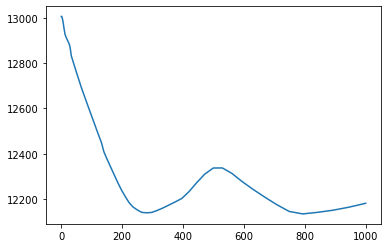

In [11]:
plt.plot(alphalist, err_vec_val)

In [12]:
alphalist

array([1.00000000e-02, 1.05956018e-02, 1.12266777e-02, 1.18953407e-02,
       1.26038293e-02, 1.33545156e-02, 1.41499130e-02, 1.49926843e-02,
       1.58856513e-02, 1.68318035e-02, 1.78343088e-02, 1.88965234e-02,
       2.00220037e-02, 2.12145178e-02, 2.24780583e-02, 2.38168555e-02,
       2.52353917e-02, 2.67384162e-02, 2.83309610e-02, 3.00183581e-02,
       3.18062569e-02, 3.37006433e-02, 3.57078596e-02, 3.78346262e-02,
       4.00880633e-02, 4.24757155e-02, 4.50055768e-02, 4.76861170e-02,
       5.05263107e-02, 5.35356668e-02, 5.67242607e-02, 6.01027678e-02,
       6.36824994e-02, 6.74754405e-02, 7.14942899e-02, 7.57525026e-02,
       8.02643352e-02, 8.50448934e-02, 9.01101825e-02, 9.54771611e-02,
       1.01163798e-01, 1.07189132e-01, 1.13573336e-01, 1.20337784e-01,
       1.27505124e-01, 1.35099352e-01, 1.43145894e-01, 1.51671689e-01,
       1.60705282e-01, 1.70276917e-01, 1.80418641e-01, 1.91164408e-01,
       2.02550194e-01, 2.14614120e-01, 2.27396575e-01, 2.40940356e-01,
      

In [13]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model_cv = LassoCV(alphas = alphavec, cv=5)
lasso_model_cv.fit(X_train_poly_6, y_train_poly_6)

/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 933187315.4537964, tolerance: 209822202.8014642
  model = cd_fast.enet_coordinate_descent_gram(
/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1793444663.178711, tolerance: 209822202.8014642
  model = cd_fast.enet_coordinate_descent_gram(
/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3815184718.5614624, tolerance: 209822202.8014642
  model = cd_fast.enet_coordinate_descent_gram(
/Us

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [14]:
lasso_model_cv.alpha_

43.470131581250264

In [31]:
val_pred = lasso_model_cv.predict(X_val_poly_6)

In [32]:
r2_score(y_val_poly_6, val_pred)

0.787955855805035

In [33]:
np.mean(np.abs(val_pred - y_val_poly_6))

12786.829599202223

In [17]:
alphavec = 10**np.linspace(-2,2,200)

ridge_model_cv = RidgeCV(alphas = alphavec, cv=5)
ridge_model_cv.fit(X_train_poly_6, y_train_poly_6)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [18]:
val_pred_ridge = ridge_model_cv.predict(X_val_poly_6)
np.mean(np.abs(val_pred_ridge - y_val_poly_6))

12546.24561825323

In [34]:
r2_score(y_val_poly_6, val_pred_ridge)

0.8019082339401242

In [19]:
ridge_model_cv.alpha_

3.739937302478798

In [20]:
from sklearn.linear_model import lars_path

In [21]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train_poly_6.values, y_train_poly_6.values, method='lasso')

Computing regularization path using the LARS ...


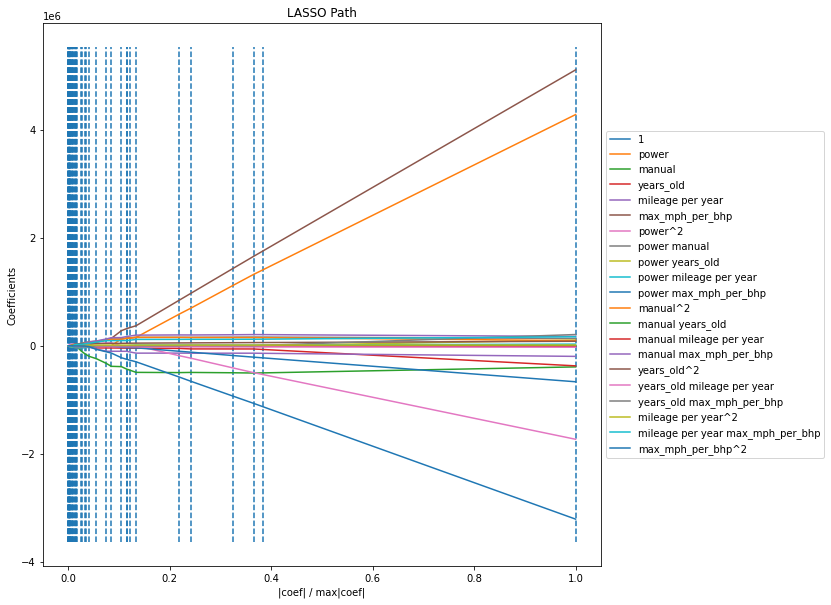

In [22]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train_poly_6.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [23]:
alphas = 10 ** np.linspace(-2, 2, 200)

enet_model = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                          alphas = alphas,
                          cv=5,
                          max_iter=4000)

enet_model.fit(X_train_poly_6, y_train_poly_6)

r_squared_train = enet_model.score(X_train_poly_6, y_train_poly_6)
r_squared_test = enet_model.score(X_val_poly_6, y_val_poly_6)
alpha = enet_model.alpha_
l1_ratio = enet_model.l1_ratio_

print("r_squared_train: ", round(r_squared_train, 3))
print("r_squared_test: ", round(r_squared_test, 3))
print("alpha: ", round(alpha, 3))
print("l1_ratio: ", l1_ratio)

/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814933678.7990723, tolerance: 209822202.8014642
  model = cd_fast.enet_coordinate_descent_gram(
/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3473968445.319519, tolerance: 209822202.8014642
  model = cd_fast.enet_coordinate_descent_gram(
/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330338776.38983154, tolerance: 207077558.67708015
  model = cd_fast.enet_coordinate_descent_gram(
/U

r_squared_train:  0.814
r_squared_test:  0.775
alpha:  0.01
l1_ratio:  1.0


/Users/william.bell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245351891636.35114, tolerance: 264644257.46256915
  model = cd_fast.enet_coordinate_descent(


In [24]:
val_pred_en = enet_model.predict(X_val_poly_6)
np.mean(np.abs(val_pred_en - y_val_poly_6))

13098.56464621431

In [25]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

regr_trans = TransformedTargetRegressor(
    regressor=enet_model,
    transformer=QuantileTransformer(n_quantiles=900, output_distribution="normal"),
)
regr_trans.fit(X_train_poly_6, y_train_poly_6)
y_pred_df_trans = regr_trans.predict(X_val_poly_6)
np.mean(np.abs(y_pred_df_trans - y_val_poly_6))

11793.685210699392

In [26]:
r2_score(y_val_poly_6, y_pred_df_trans)

0.7423050212798807

In [27]:
poly_non_test_df = pd.read_pickle("./poly_non_test_df.pkl")

scaler = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_scaled = pd.DataFrame(scaler.fit_transform(poly_non_test_df.values),
                                columns=poly_non_test_df.columns, index=poly_non_test_df.index)

X_train_df_2, X_val_df_2, y_train_df_2, y_val_df_2 = train_test_split(X_train_scaled, y_non_test, test_size=.25)

In [35]:
regr_trans = TransformedTargetRegressor(
    regressor=enet_model,
    transformer=QuantileTransformer(n_quantiles=900, output_distribution="normal"),
)
regr_trans.fit(X_train_df_2, y_train_df_2)
y_pred_df_trans = regr_trans.predict(X_val_df_2)
np.mean(np.abs(y_pred_df_trans - y_val_df_2))

12104.472418127332

In [36]:
r2_score(y_val_df_2, y_pred_df_trans)

0.7502322604218858

In [37]:
from sklearn.preprocessing import PowerTransformer

regr_trans = TransformedTargetRegressor(
    regressor=enet_model,
    transformer=PowerTransformer(method='box-cox'),
)
regr_trans.fit(X_train_df_2, y_train_df_2)
y_pred = regr_trans.predict(X_val_df_2)
np.mean(np.abs(y_pred - y_val_df_2))

11600.60664587756

In [38]:
r2_score(y_val_df_2, y_pred)

0.7531843815522267